# Simulation of a Ising 2D system using the Monte Carlo method and the Metropolis algorithm

<br />
<div style="background-color: gold">You could download a jupyter notebook with this tutorial from <a href="notebook.ipynb">here</a>.</div>

This tutorial was made in order to give a practical guide for the elaboration of a Monte Carlo program for the simulation of a Ising 2D system. This program is built in **python3**. The complexity of this code is minimal. However, this kind of simulations **is not** efficient in python. For this reason, I recommend you to use other programming language like **c++** or **fortran** because they are high performance programming laguages.

We are going to simulate an [Ising 2D system](https://en.wikipedia.org/wiki/Square-lattice_Ising_model), which was solved by Lard Onsager in 1944 in an analytical way. The analytical solution gives the following expression for the critical temperature $\left(T_c\right)$:

$$
\frac{k_{B}T_{c}}{J} = \frac{2}{\ln\left(1 + \sqrt{2}\right)} \approx 2.26918531421
$$
where $k_B$ is the Boltzmann constant and $J$ is the exchange constant.

What we want to do is to simulate this system and compare this valure with one obtaines by using Monte Carlo method.

The Hamiltonian is given by

$$
\mathcal{H} = -J \sum_{\left<i, j\right>} \sigma_i \sigma_j
$$
where $J$ is the exchange constant, $\sigma_i$ and $\sigma_j$ are the spins in the sites $i$ and $j$, respectively, and $\left<i, j\right>$ means the summation over the nearest neighbors.

We want to compute several quantities like the magnetization, energy, magnetic susceptibility and specific heat. For this, we are going to use this equations:

- Magnetization:
$$
M = \frac{1}{N}\sum_{i}\sigma_{i}
$$
- Energy:
$$
E = \mathcal{H}
$$
- Magnetic susceptibility:
$$
\chi = \frac{\left<M^2\right> - \left<M\right>^2}{k_B T} = \frac{\text{variance}\left(M\right)}{k_B T}
$$
- Specific heat:
$$
C_v = \frac{\left<E^2\right> - \left<E\right>^2}{k_B T^2} = \frac{\text{variance}\left(E\right)}{k_B T^2}
$$

Finally, we are going to plot $\chi$ and $C_v$ as functions of the temperature and they should exhibit a maximum value near of $T_c$.

### Importing libraries

We are going to need some libraries for different purposes. Basically, the only external libraries that we will use are **numpy**, for the numerical computations, and **matplotlib**, for the plots. The another one is **itertools**, which comes with the core of **python**.

You could install both **numpy** and **maplotlib** using the following command in the console:

```bash
pip install numpy matplotlib
```

However, if you are using python by means of [Anaconda](https://www.anaconda.com/distribution/), those libraries come installed and you do not need to install them.

Let's start coding.

In [1]:
import numpy
from matplotlib import pyplot
from itertools import product

We need the method **product** from **itertools** in order to get the cartesian product of two arrays.

First of all, we need to define some quantities like the **length** of the system, the exchange constant **J** and the value of the Boltzmann constant **kB**. The last two are defined to 1.0 for simplicity and, in this way, we are working with reduced units.

In [2]:
length = 10
J = 1.0
kB = 1.0

A useful variable to define is the amount of sites **N** of the system. In this case, we have a squared system and, therefore, we have that:

In [3]:
N = length * length

Ok. Now, we are going to make the lattice. For this, we compute the cartesian product between two arrays from 0 to **length**:

In [4]:
sites = list(product(range(length), repeat=2))

In this way, **sites** is a list composed by **N** tuples, which correspond to the pairs $\left(i, j\right)$:

In [5]:
print(sites)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


We could plot the lattice for visualizing the system:

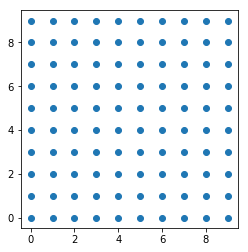

In [6]:
x, y = numpy.array(sites).T
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.set_aspect("equal")
pyplot.show()

As you can see, we have a lattice of $10\times10$ sites, due to **lenght** is equal to 10.

Now we need a function to get a random configuration. A random configuration consists in to assign randomly a spin value for each site in the lattice. In is worthy to say that in our system we just have two possible states for the spins: -1 or 1, corresponding to $\downarrow$ or $\uparrow$ states, respectively.

In [7]:
def random_config():
    return {site: numpy.random.choice([-1, 1]) for site in sites}

We could call the last function to get a random configuration and assign it to the variable **spins**

In [8]:
spins = random_config()

**spins** is a dictionary containing the values of the spins for each site. Therefore, **spins** just has -1 or 1 vaules:

In [9]:
print(spins.values())

dict_values([1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1])


Now, we could plot the state of our system for the **spins** configuration. For this, let's to write a function to plot the state using arrows:

In [10]:
def plot_state():
    x, y = numpy.array(sites).T
    spins_plain = numpy.array([spins[site] for site in sites])
    
    colors = numpy.array(["k"] * N, dtype=str)
    colors[spins_plain == 1] = "r"
    
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    ax.quiver(x, y, 0, spins_plain, color=colors,
              pivot="middle", width=0.01)
    ax.set_aspect("equal")
    pyplot.show()

Let's call the last function to plot the system state:

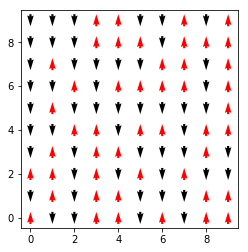

In [11]:
plot_state()

As you can observe, the random configuration is approximately composed by the same number of up and down states.

Ok. Until now, we have a list of **sites**, composed by **N** tuples $\left(i, j\right)$, and a dictionary **spins**, composed by **N** keys corresponding to the pairs $\left(i, j\right), whose values are -1 or 1.

Perfect! Let's plot our lattice with the corresponding pair for each site:

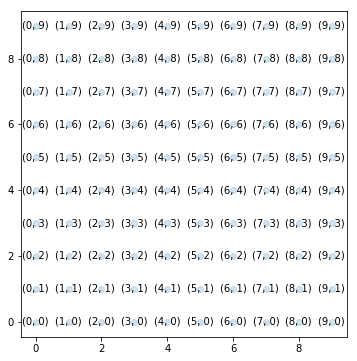

In [12]:
x, y = numpy.array(sites).T
fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(x, y, alpha=0.2)
for site in sites:
    i, j = site
    pyplot.text(i, j, site,
                va="center", ha="center")
ax.set_aspect("equal")
pyplot.show()

Now we should compute the nearest neighbors for each site. In our system, we have periodic boundary conditions, which  means that, for example, the site $\left(0, 0\right)$ should have for neighbors the sites $\left(1, 0\right)$, $\left(9, 0\right)$, $\left(0, 1\right)$ and $\left(0, 9\right)$. Therefore, let's make a dictionary **nhbs** which has for *key* the pair $\left(i, j\right)$ of the site and for value a tuple of pairs for its neighbors. It is to say, **nhbs[(0, 0)]** should be ((1, 0), (9, 0), (0, 1), (0, 9)).

In [13]:
nhbs = {}
for i, j in sites:
    right = ((i + 1) % length, j)
    left = ((i - 1) % length, j)
    up = (i, (j + 1) % length)
    down = (i, (j - 1) % length)
    
    nhbs[(i, j)] = (right, left, up, down)

Thus, **nhbs[(0, 0)]** should be that we said:

In [14]:
print(nhbs[(0, 0)])

((1, 0), (9, 0), (0, 1), (0, 9))


and each site should have four neighbors.

Until now, we have built all the geometrical specifications of the system. Now, we need to compute some quantities:

In [15]:
def magnetization():
    return sum(spins.values())

def local_energy(site):
    energy = 0.0
    for nhb in nhbs[site]:
        energy += spins[site] * spins[nhb]
    return - J * energy

def total_energy():
    energy = 0.0
    for site in sites:
        energy += local_energy(site)
    return 0.5 * energy

We are going to employ the **local_energy** function in the [Metropolis algorithm](http://hua-zhou.github.io/teaching/st758-2014fall/top10/metropolis.pdf) to compute the difference between the new and old energy. We are going to implement the Metropolis algorithm inversing the site's spin firstly and watching when the acceptance of this is not favored. In that case, it is rejected the spin inversion and we need to change the spin newly.

In [16]:
def metropolis(site, T):
    oldEnergy = local_energy(site)
    spins[site] *= -1
    newEnergy = local_energy(site)
    deltaE = newEnergy - oldEnergy
    if deltaE > 0 and \
       numpy.random.uniform(0, 1) > numpy.exp(- deltaE / (kB * T)):
        spins[site] *= -1

For the implementation of the **monte_carlo_step**, you should remember the definition of Monte Carlo step (MCS). In this case, an MCS consists in to apply the Metropolis algorithm over **N** sites chosen in a random fashion.

In [17]:
def monte_carlo_step(T):
    for _ in range(N):
        index = numpy.random.randint(0, N)
        metropolis(sites[index], T)

The next step is to make a function to perform a temperature step. This function requires both the amount of MCS and the temperature and it will return two arrays which correspond to the magnetization and energy of the system as functions of the Monte Carlo steps. It is to said, return the evolution in the magnetization and energy.

In [18]:
def temperature_step(amount_mcs, T):
    mags = numpy.zeros(amount_mcs)
    enes = numpy.zeros(amount_mcs)
    for i in range(amount_mcs):
        monte_carlo_step(T)
        mags[i] = magnetization()
        enes[i] = total_energy()
    return mags, enes

Let's make a minimal simulation until here. We are going to simulate our system at low temperature, starting from a random configuration, and we are going to plot the evolution of the magnetization and energy. For this, we need to define some quantities like the **amount_mcs** and **T**:

In [19]:
amount_mcs = 100
T = 0.001

Then, we could make this small simulation:

In [20]:
spins = random_config()
mags, enes = temperature_step(amount_mcs, T)

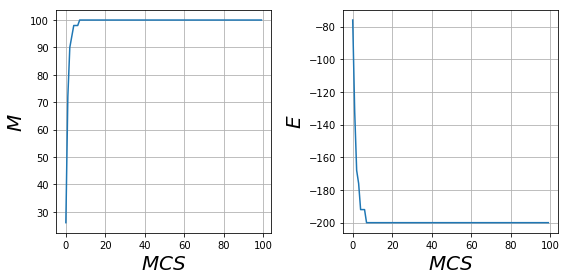

In [21]:
fig = pyplot.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(mags)
ax.grid()
ax.set_xlabel(r"$MCS$", fontsize=20)
ax.set_ylabel(r"$M$", fontsize=20)

ax2.plot(enes)
ax2.grid()
ax2.set_xlabel(r"$MCS$", fontsize=20)
ax2.set_ylabel(r"$E$", fontsize=20)

pyplot.tight_layout()
pyplot.show()

As you can observe, both the magnetization and the energy tend to a fixed value as the MCS goes. Also, we could plot the final state for this simulation:

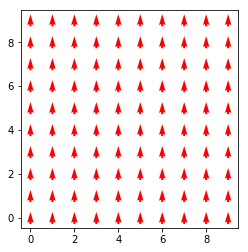

In [22]:
plot_state()

In this case, we have obtained a perfect ferromagnetic state. However, in this simulation could have exhibited domain walls due to the low temperature and the lack of temperature cooling. Run this simulation several times and observe the different possible behaviors.

In order to continue with our program, we should implement some code for running simulations varying the temperature, from high to low temperature. For this, we need to define some variables like **T_high**, **T_low** and **points**, which corresponds to the amount of points between **T_high** and **T_low**, including both.

In [23]:
T_high = 5.0
T_low = 0.001
points = 101

With this, we could compute a linspace between **T_high** and **T_low** and store it into **tempt**:

In [24]:
temps = numpy.linspace(T_high, T_low, points)

Moreover, this kind of simulations requires a high amount of MCS in order to get a good statistical results. Thus, let's define again **amount_mcs** with a higher value:

In [25]:
amount_mcs = 5000

We have everything almost made. Let's to define two numpy arrays, for the energies and magnetizations, to store the system evolution both the temperature and the time. It is to say, we are going to have two matrices with shape ```(points, amount_mcs)``` which will have all the required data to compute statistical averages.

In [26]:
data_energies = numpy.zeros(shape=(points, amount_mcs))
data_magnetizations = numpy.zeros(shape=(points, amount_mcs))

Finally, we need to make a **for** statement over **temps**. For each iteration, we saved the magnetization and energy into **data_magnetizations** and **data_energies**, respectively. This part is the one that requires more time. In a computer with Intel® Core™ i7-3612QM CPU @ 2.10GHz lasted about 27min 13s.

In [27]:
spins = random_config()
for ind_T, T in enumerate(temps):
    mags, enes = temperature_step(amount_mcs, T)
    data_energies[ind_T] = enes
    data_magnetizations[ind_T] = mags

As expected, the final state corresponds to a ferromagnetic state, where all spins are pointing in the same direction.

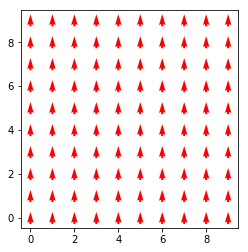

In [28]:
plot_state()

The next step consists in to plot the energy and magnetization. For this, we are going to discard the half of MCS for the relaxation. This quantity is named **tau**. Thus, we compute the mean of **data_energies** and **data_magnetizations**, after **tau**, for each temperature. As the evolution with respect to the MCS was saved in the axis=1, we need to compute the mean over the axis=1:

In [29]:
tau = amount_mcs // 2
energy_mean = numpy.mean(data_energies[:, tau:], axis=1)
magnetization_mean = numpy.mean(numpy.abs(data_magnetizations[:, tau:]), axis=1)

The shape of **temps**, **energy_mean** and **magnetization_mean** should be the same:

In [30]:
print(temps.shape)
print(energy_mean.shape)
print(magnetization_mean.shape)

(101,)
(101,)
(101,)


Let's plot **energy_mean** and **magnetization_mean** as functions of **temps**:

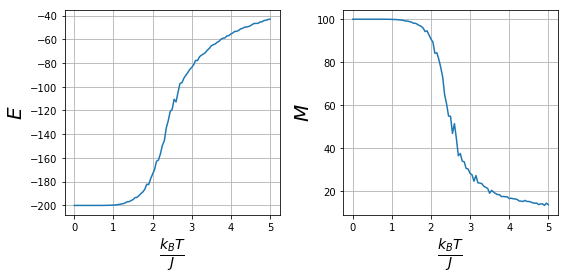

In [31]:
fig = pyplot.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(temps, energy_mean)
ax.set_xlabel(r"$\frac{k_B T}{J}$", fontsize=20)
ax.set_ylabel(r"$E$", fontsize=20)
ax.grid()

ax2.plot(temps, magnetization_mean)
ax2.set_xlabel(r"$\frac{k_B T}{J}$", fontsize=20)
ax2.set_ylabel(r"$M$", fontsize=20)
ax2.grid()

pyplot.tight_layout()
pyplot.show()

Note that the magnetization is equal to 100 for low temperatures. This indicates that all the **N** sites are pointing in the same direction, as it is expected.

Finally, let's compute the specific heat and the magnetic suseptibility by using the expressions for these quantities. Remember that the variance of some quantity is equal to the squared standard deviation related to this quantity. In this way, we compute first the standard deviations for the energy and the magnetization:

In [32]:
energy_std = numpy.std(data_energies[:, tau:], axis=1)
magnetization_std = numpy.std(numpy.abs(data_magnetizations[:, tau:]), axis=1)

And having the standard deviations, we can compute the specific heat and the susceptibility:

In [33]:
specific_heat = energy_std ** 2 / (kB * temps * temps)
susceptibility = magnetization_std ** 2 / (kB * temps)

Now, we can plot the last quantities as functions of the temperature. Let's to make a vertical line corresponding to the critical temperature for this system:

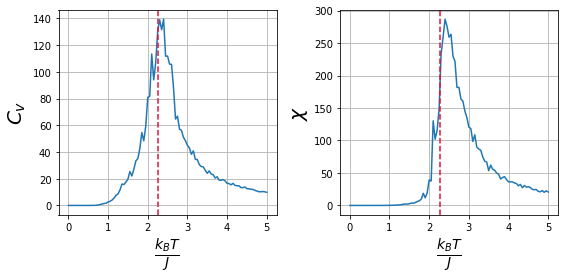

In [34]:
fig = pyplot.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(temps, specific_heat)
ax.set_xlabel(r"$\frac{k_B T}{J}$", fontsize=20)
ax.set_ylabel(r"$C_v$", fontsize=20)
ax.grid()

ax2.plot(temps, susceptibility)
ax2.set_xlabel(r"$\frac{k_B T}{J}$", fontsize=20)
ax2.set_ylabel(r"$\chi$", fontsize=20)
ax2.grid()

ax.axvline(2.26918531421, ls="--", color="crimson")
ax2.axvline(2.26918531421, ls="--", color="crimson")

pyplot.tight_layout()
pyplot.show()

As expected, both the specific heat and the magnetic susceptibility exhibit their maximum values at a temperature near to the critical temperature (dashed red line). However, it is worthy to say that the critical temperature is defined for a system with infinite length. For this reason, the peaks of the last figures are not exactly equal to the theoretical value for $T_c$.

Perfect !!! At this point, we could play with this program and make simulations for other sizes or, even, compute other interesting quantities like Binder cumulants or correlation times. You should try it !

If you have any question or suggestion, don't hesitate to contact me at [jdalzatec@gmail.com](mailto:jdalzatec@gmail.com).

<br />
<div style="background-color: gold">You could download a jupyter notebook with this tutorial from <a href="notebook.ipynb">here</a>.</div>